## Importok

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

###Fájlok beolvasása

In [2]:
boltok = pd.read_excel("Boltok.xlsx") #Boltok
cikk = pd.read_excel("Cikk.xlsx") #Cikkek
cikkcsop = pd.read_excel("Cikk_cikkcsop.xlsx") #Cikk_cikkcsoportok
cikkcsoportok = pd.read_excel("Cikkcsoportok.xlsx") #Cikkcsoportok
geo = pd.read_excel("Geo adatok.xlsx") #Geomadatok
keszlet = pd.read_excel("keszlet.xlsx") #Keszlet
gyarto = pd.read_excel("Gyartok.xlsx") #Gyartok

#Ismerkedünk a Python-nal, egy-két alap lekérdezés és kiiratás 

### Hány darab bolt van?

In [3]:
len(boltok)

33

In [4]:
boltok

,sek_id,sek_desc,sek_cim
0,10200,Cég 0. Raktár1,5600
1,10300,Cég 0. Raktár2,5600
2,30103,Cég I. Bolt1,5500
3,30104,Cég I. Bolt2,5510
4,30105,Cég I. Bolt3,5516
5,30106,Cég I. Bolt4,5520
6,30108,Cég I. Bolt5,5525
7,30109,Cég I. Bolt6,5525
8,30110,Cég I. Bolt7,5526
9,30111,Cég I. Bolt8,5510


In [5]:
cikk.head(10)

,cik_id,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id
0,1000001,Termék 0000001,304205600,DB,50136,A
1,1000002,Termék 0000002,303781200,DB,50136,A
2,1000003,Termék 0000003,1517109000,DB,50260,A
3,1000004,Termék 0000004,403905300,DB,50258,A
4,1000008,Termék 0000005,2202901010,DB,50232,A
5,1000009,Termék 0000006,2202901000,DB,50232,A
6,1000010,Termék 0000007,2202901000,DB,50232,A
7,1000011,Termék 0000008,406,DB,53218,A
8,1000013,Termék 0000009,406,DB,53218,A
9,1000014,Termék 0000010,401301100,DB,53218,A


In [6]:
cikkcsop.head(10)

,ccsop_id4,cik_id
0,3303,1000001
1,3303,1000002
2,3206,1000003
3,3204,1000004
4,219,1000005
5,219,1000006
6,3204,1000007
7,3508,1000008
8,3203,1000009
9,3203,1000010


In [7]:
cikkcsoportok.tail(10)
#len(cikkcsoportok)

,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_id4,ccsop_desc4
299,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8402,"ALSÓRUHÁZAT, FEHÉRNEM?"
300,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8403,"ZOKNI ,HARISNYA"
301,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8406,EGYÉB RUHÁZATI KIEGÉSZÍT?K
302,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,85,"SPORT, JÁTÉK, SZABADIDŐ",8501,"SPORT, JÁTÉK, SZABADIDŐ"
303,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8601,"VIRÁGMAGOK, VIRÁGOK"
304,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8602,VIRÁGFÖLD
305,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8603,KERTÉSZETI CIKKEK
306,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,91,SZOLGÁLTATÁSOK,9101,SZOLGÁLTATÁSOK
307,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9201,TAPADÓ GÖNYGYÖLEG
308,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9202,NEM TAPADÓ GÖNYGYÖLEG


In [8]:
geo[(geo["geo_orszag"] == "Magyarország".decode('utf-8')) &(geo["geo_megye"] == "Bekes megye".decode('utf-8'))].head(10)

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
1590,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1591,5501,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1592,5502,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1593,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
1594,5515,NaN,Ecsegfalva,Bekes megye,Dél-Alföld,Magyarország
1595,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
1596,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
1597,5521,NaN,Töltse Ki,Bekes megye,Dél-Alföld,Magyarország
1598,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország
1599,5526,NaN,Kertészsziget,Bekes megye,Dél-Alföld,Magyarország


In [9]:
keszlet[100:200]

,cik,tph,datum,mennyiseg
100,1000503,30302,2016-02-02,41.000
101,1000505,30302,2016-02-02,4.000
102,1000514,30302,2016-02-02,1.000
103,1000518,30302,2016-02-02,-2.000
104,1000523,30302,2016-02-02,-4.000
105,1000530,30302,2016-02-02,1.000
106,1000541,30302,2016-02-02,7.000
107,1000545,30302,2016-02-02,0.000
108,1000547,30302,2016-02-02,2.074
109,1000549,30302,2016-02-02,1.000


##Készlet kerekítése 100-asra

In [10]:
keszlet.mennyiseg = keszlet.mennyiseg.apply(lambda x: np.round(x,decimals=-2))
keszlet.head(20)
#np.round(keszlet.mennyiseg, decimals=-2)

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,0
1,1000004,30302,2016-02-02,0
2,1000008,30302,2016-02-02,0
3,1000011,30302,2016-02-02,0
4,1000013,30302,2016-02-02,0
5,1000015,30302,2016-02-02,0
6,1000019,30302,2016-02-02,0
7,1000020,30302,2016-02-02,0
8,1000022,30302,2016-02-02,0
9,1000024,30302,2016-02-02,0


In [11]:
keszlet2 = keszlet
keszlet2 = keszlet2[keszlet2["mennyiseg"] != 0]
keszlet2.head(10)

,cik,tph,datum,mennyiseg
136,1000642,30302,2016-02-02,-100
230,1001063,30302,2016-02-02,300
231,1001065,30302,2016-02-02,100
332,1001575,30302,2016-02-02,100
384,1001876,30302,2016-02-02,100
447,1002138,30302,2016-02-02,100
452,1002156,30302,2016-02-02,100
453,1002163,30302,2016-02-02,100
476,1002279,30302,2016-02-02,200
477,1002280,30302,2016-02-02,-100


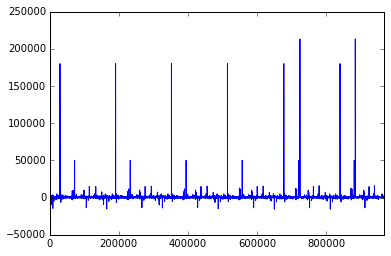

In [12]:
keszlet2.mennyiseg.plot()

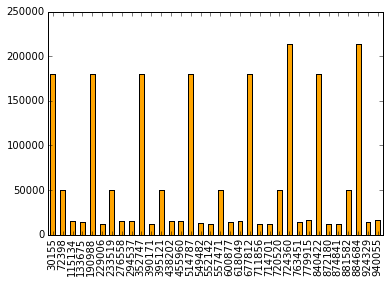

In [13]:
keszlet2[keszlet2["mennyiseg"]>10000].mennyiseg.plot(kind='bar', color='orange')

In [14]:
milyentermek=keszlet2[keszlet2["mennyiseg"]>10000]
eredm = pd.merge(milyentermek, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
eredm_2 = pd.merge(eredm,cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
eredm_2.sort(columns="mennyiseg",ascending=False)

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
19,1011978,30105,2016-02-07,213200,3809,1011978,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
18,1011978,30105,2016-02-06,213200,3809,1011978,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
0,1007509,30318,2016-02-02,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
15,1007509,30318,2016-02-07,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
3,1007509,30318,2016-02-03,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
6,1007509,30318,2016-02-04,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
9,1007509,30318,2016-02-05,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
12,1007509,30318,2016-02-06,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
4,1007509,30352,2016-02-03,50000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
7,1007509,30352,2016-02-04,50000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"


## Legkeresetebb termékekből hány darab van a boltokban?

In [15]:
keresett = keszlet2[keszlet2["cik"] == 1011978]
asdf = keresett.groupby(["tph"]).mean()

In [16]:
asdf["mennyiseg"]

tph
30105    213200.000000
30110       200.000000
30116       100.000000
30123       200.000000
30126       100.000000
30313       150.000000
30318       100.000000
30323       100.000000
30327       200.000000
30328       133.333333
30329       200.000000
30330       200.000000
30352      -200.000000
Name: mennyiseg, dtype: float64

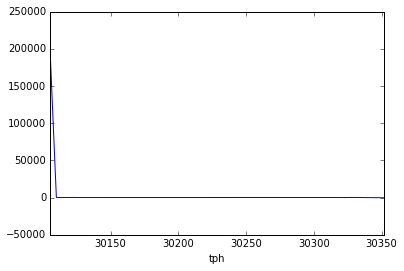

In [17]:
asdf.mennyiseg.plot()

In [18]:
keszlet_reszlet = keszlet[(keszlet["tph"] == 30313) & (keszlet["datum"] == "2016-02-02") & (keszlet["cik"] < 1000022)]

In [19]:
keszlet_reszlet
result = pd.merge(keszlet, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
result_2 = pd.merge(result,cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result_2.head(10)

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1000002,30323,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1000002,30324,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1000002,30325,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1000002,30327,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1000002,30329,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


#Feladatok

## Vegyük ki a geo adathalmazból a nem magyarországi adatokat!

In [20]:
geo = geo[geo["geo_orszag"] == "Magyarország".decode('utf-8')]
geo.head(10)

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,0,NaN,Töltse Ki,Nem besorolt,Nem besorolt,Magyarország
3,1000,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
4,1001,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
5,1010,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
6,1011,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
7,1012,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
8,1013,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
9,1014,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
10,1015,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
11,1016,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország


In [21]:
geo.tail(10)

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
3260,7973,NaN,Bürüs,Baranya megye,Dél-Dunántúl,Magyarország
3261,7981,NaN,Merenye,Baranya megye,Dél-Dunántúl,Magyarország
3262,7985,NaN,Kisdobsza,Baranya megye,Dél-Dunántúl,Magyarország
3263,8130,NaN,Enying Kabóka puszta,Fejer megye,Közép-Dunántúl,Magyarország
3264,8600,NaN,Siófok-Kiliti,Somogy megye,Dél-Dunántúl,Magyarország
3265,8681,NaN,Visz,Somogy megye,Dél-Dunántúl,Magyarország
3266,8731,NaN,Tikos,Somogy megye,Dél-Dunántúl,Magyarország
3267,8858,NaN,Porrogszentkirály,Somogy megye,Dél-Dunántúl,Magyarország
3270,15,NaN,Bialystok,Magyarország,Külföld,Magyarország
3274,7967,NaN,Markóc,Baranya megye,Dél-Dunántúl,Magyarország


##Nézzük meg, milyen területű készleteink vannak (hol vannak a boltok)!
###(félek hogy csak Békés megyeiek lesznek :( ) - igen


In [22]:
res=pd.merge(boltok, keszlet, left_on='sek_id', right_on='tph', how='inner')         
res2=pd.merge(res, geo, left_on='sek_cim', right_on='geo_id', how='inner')
res2.head(20)

,sek_id,sek_desc,sek_cim,cik,tph,datum,mennyiseg,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,30103,Cég I. Bolt1,5500,1000002,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1,30103,Cég I. Bolt1,5500,1000004,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,1000008,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30103,Cég I. Bolt1,5500,1000011,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30103,Cég I. Bolt1,5500,1000013,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
5,30103,Cég I. Bolt1,5500,1000019,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
6,30103,Cég I. Bolt1,5500,1000020,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
7,30103,Cég I. Bolt1,5500,1000022,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
8,30103,Cég I. Bolt1,5500,1000024,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
9,30103,Cég I. Bolt1,5500,1000026,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország


In [23]:
set(res2["geo_megye"].tolist())

{u'Bekes megye'}

## Csináljunk egy táblázatot, amelyben megnézzük hogy mely terméket ki gyártotta!

In [24]:
gyarto.head()

,gyarto_id,gyarto_desc
0,50146,Gyártó 1
1,52600,Gyártó 2
2,52612,Gyártó 3
3,53022,Gyártó 4
4,53050,Gyártó 5


In [25]:
result = pd.merge(cikk, cikkcsop, left_on='cik_id', right_on='cik_id', how='inner')
result.drop('cjel_id', axis=1, inplace=True)
result.drop('cik_me_id', axis=1, inplace=True)
result.drop('vtsz_id', axis=1, inplace=True)
result.head(10)

,cik_id,cik_desc2,cik_gyart,ccsop_id4
0,1000001,Termék 0000001,50136,3303
1,1000002,Termék 0000002,50136,3303
2,1000003,Termék 0000003,50260,3206
3,1000004,Termék 0000004,50258,3204
4,1000008,Termék 0000005,50232,3508
5,1000009,Termék 0000006,50232,3203
6,1000010,Termék 0000007,50232,3203
7,1000011,Termék 0000008,53218,3103
8,1000013,Termék 0000009,53218,3103
9,1000014,Termék 0000010,53218,3211


In [26]:
result2 = pd.merge(result, cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result2.drop('ccsop_id4', axis=1, inplace=True)
result2.drop('ccsop_id', axis=1, inplace=True)
result2.drop('ccsop_id2', axis=1, inplace=True)
result2.drop('ccsop_id3', axis=1, inplace=True)
result2.head(10)

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000319,Termék 0000269,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000584,Termék 0000468,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000586,Termék 0000470,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1001115,Termék 0000872,52490,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1015395,Termék 0010272,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1015397,Termék 0010273,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1015398,Termék 0010274,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [27]:
result3 = pd.merge(result2, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result3.drop('gyarto_id',axis=1, inplace=True)
result3.head(10)

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
5,1015412,Termék 0010284,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
6,1015413,Termék 0010285,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
7,1001141,Termék 0000898,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
8,1001143,Termék 0000900,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
9,1016785,Termék 0011471,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93


## Listázd ki milyen termékeink vannak (ccsop_desc4)! Mindegyik csak egyszer szerepeljen!

In [28]:
csop=list(set(cikkcsoportok["ccsop_desc4"].tolist()))
ccsop4 = pd.DataFrame(csop)
ccsop4.columns = ["Termék"]
ccsop4

,Termék
0,KIS KISZERELÉS?
1,"PEZSG?TABLETTÁK, ITALPOROK"
2,CSIRKE CSOMAGOLT
3,NAPOZÓSZEREK
4,SÓ ZACSKÓS
5,PÁLINKÁK
6,"LEKVÁROK , DZSEMEK"
7,ZÖLDSÉG EGYÉB
8,SERTÉS CSOMAGOLT
9,"IZZÓK, FÉNYCSÖVEK"


#>>>>>>>>>>>>>>>>>Diagram feladatok:<<<<<<<<<<<<<<<<<<<<<<<

## Készítsünk diagramot, hogy egy adott napon, adott boltnak milyen termékből mennyi készlete volt!
### hint: előtte ugye össze kell mergelni a termékeket a készlettel, és akkor a kódsorban megadott feltétel alapján kell megcsinálni az eloszlást :) Remélhetőleg  bplot vagy pyplot vagy seaborn-nel meg tudjuk szépen csinálni, mert először nem akaródzott

In [29]:
elso = keszlet2[(keszlet2["tph"]==30302) & (keszlet2["datum"]=="2016-02-02")]
elso.index = elso["cik"]
len(elso)

406

In [30]:
elso.drop("cik",axis=1, inplace=True)
elso.drop("tph",axis=1, inplace=True)
elso.drop("datum",axis=1, inplace=True)

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()

In [31]:
#elso.drop("datum",axis=1, inplace=True)
#elso = elso[(elso["mennyiseg"]<1) & (elso["mennyiseg"]>-1) & (elso["mennyiseg"]!=0)]
elso = elso[(elso["mennyiseg"]>100)]
elso.head(10)

,mennyiseg
cik,
1001063,300
1002279,200
1002590,200
1002826,200
1002828,200
1002950,200
1003515,200
1003519,300
1003661,300


## A 30302-es telephelyen 200-nál nagyobb mennyiségű készletek diagramja:

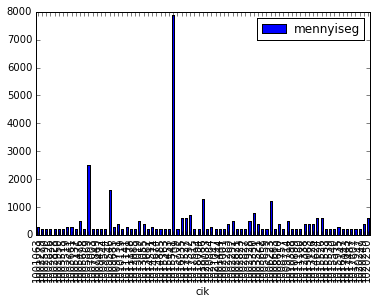

In [32]:
elso.plot(kind='bar')

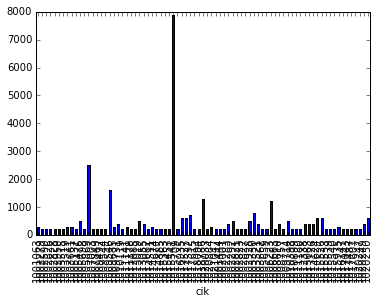

In [33]:
elso = elso[elso["mennyiseg"]>100]
elso.mennyiseg.plot(kind='bar')

## Készítsünk diagramot, hogy egy adott boltnak hogyan változik a készlete az adott egy hét alatt!

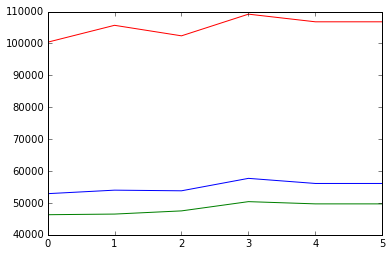

In [34]:
keszlet
masodik = keszlet2[(keszlet2["tph"]==30302)]
harmadik = keszlet2[(keszlet2["tph"]==30313)]
negyedik = keszlet2[(keszlet2["tph"]==30352)]
plt.plot(masodik.groupby(["tph","datum"])["mennyiseg"].sum()) #kék
plt.plot(harmadik.groupby(["tph","datum"])["mennyiseg"].sum()) #zöld
plt.plot(negyedik.groupby(["tph","datum"])["mennyiseg"].sum()) # piros
plt.show()

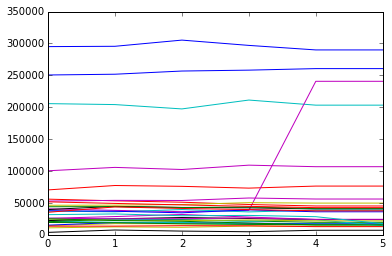

In [35]:
bolt = boltok.sek_id.tolist()
for i in bolt:
    plt.plot(keszlet2[(keszlet2["tph"])==i].groupby(["tph","datum"])["mennyiseg"].sum())
    

## Két bolt összehasonlítása

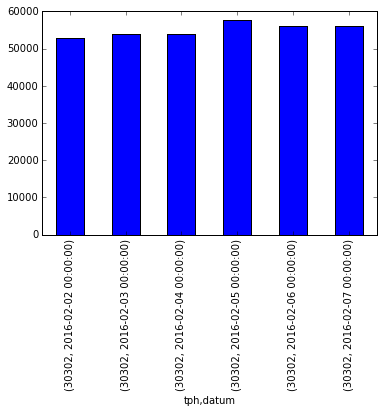

In [36]:
#masodik = masodik.groupby("datum")
#masodik = masodik.groupby(["tph","datum"])
#massum = masodik["mennyiseg"].sum()
masodik.groupby(["tph","datum"])["mennyiseg"].sum().plot(kind='bar')

In [37]:
masodik2 = keszlet2.groupby(["tph","datum"])
masodiksum = masodik2["mennyiseg"].sum()
masodiksum

tph    datum     
30103  2016-02-02     70400
       2016-02-03     77300
       2016-02-04     76000
       2016-02-05     73200
       2016-02-06     76400
       2016-02-07     76400
30104  2016-02-02    205700
       2016-02-03    204200
       2016-02-04    197400
       2016-02-05    211300
       2016-02-06    203300
       2016-02-07    203300
30105  2016-02-02     40700
       2016-02-03     38300
       2016-02-04     36300
       2016-02-05     38300
       2016-02-06    240700
       2016-02-07    240700
30106  2016-02-02     14400
       2016-02-03     17500
       2016-02-04     17300
       2016-02-05     16700
       2016-02-06     16900
       2016-02-07     16900
30108  2016-02-02     39600
       2016-02-03     44600
       2016-02-04     42900
       2016-02-05     42300
       2016-02-06     40500
       2016-02-07     40500
                      ...  
30327  2016-02-02     37700
       2016-02-03     36900
       2016-02-04     34500
       2016-02-05     39100
  

## Diagramm: Hány terméket gyártanak az egyes gyártók? +

In [38]:
#import collections
#cikkcnt=collections.Counter(cikk["cik_gyart"])
#cikkcnt.values()
#cikkcnt.keys()
result
result2 = pd.merge(result, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result2.groupby("gyarto_desc").cik_id.nunique()

gyarto_desc
Gyártó 1        1
Gyártó 101      4
Gyártó 102     68
Gyártó 103     13
Gyártó 104      9
Gyártó 106      4
Gyártó 107     30
Gyártó 108     91
Gyártó 111     55
Gyártó 112     67
Gyártó 113     58
Gyártó 116     14
Gyártó 117     50
Gyártó 118      6
Gyártó 119    110
Gyártó 120     84
Gyártó 121      1
Gyártó 122     35
Gyártó 123     21
Gyártó 124     25
Gyártó 125     22
Gyártó 127     21
Gyártó 128      5
Gyártó 129    101
Gyártó 130     84
Gyártó 131     17
Gyártó 132      2
Gyártó 135     19
Gyártó 137     14
Gyártó 138     88
             ... 
Gyártó 791      4
Gyártó 793     15
Gyártó 794      2
Gyártó 795     20
Gyártó 796      5
Gyártó 797     10
Gyártó 799      9
Gyártó 806      1
Gyártó 81      26
Gyártó 816     67
Gyártó 817     76
Gyártó 818     14
Gyártó 833      2
Gyártó 84       5
Gyártó 85      68
Gyártó 852      2
Gyártó 856     56
Gyártó 86       9
Gyártó 865      3
Gyártó 866      2
Gyártó 87      17
Gyártó 876      7
Gyártó 879      1
Gyártó 89      9

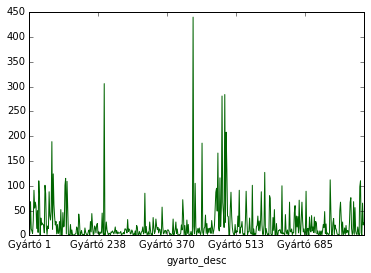

In [39]:
result2.groupby("gyarto_desc").cik_id.nunique().plot(color='DarkGreen')

## Sorba rendezve a termelési számok

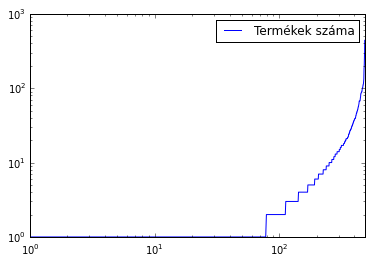

In [40]:
valami = result2.groupby("gyarto_desc").cik_id.nunique()
data = pd.DataFrame(sorted(valami))
data.columns = ["Termékek száma"]
data.plot(loglog=True)

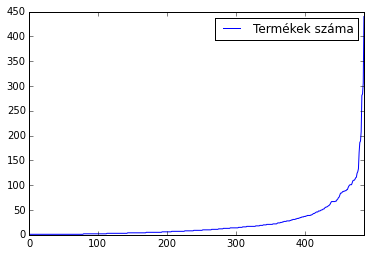

In [41]:
data.plot()

In [42]:
from collections import defaultdict

x = data["Termékek száma"]
dx = defaultdict(int)
for i in x:
    dx[i] += 1
print(dx)

defaultdict(<type 'int'>, {1: 79, 2: 34, 3: 30, 4: 27, 5: 23, 6: 14, 7: 19, 8: 13, 9: 13, 10: 13, 11: 10, 12: 7, 13: 10, 14: 12, 15: 6, 16: 6, 17: 13, 18: 6, 19: 5, 20: 5, 21: 9, 22: 6, 23: 1, 24: 4, 25: 3, 26: 2, 27: 4, 28: 5, 29: 2, 30: 2, 31: 4, 32: 2, 33: 3, 34: 2, 35: 2, 36: 3, 37: 3, 38: 2, 39: 5, 40: 2, 41: 1, 42: 1, 43: 2, 44: 1, 45: 1, 46: 3, 48: 3, 49: 1, 50: 2, 51: 1, 52: 2, 54: 1, 55: 1, 56: 2, 57: 1, 58: 1, 59: 1, 60: 1, 62: 1, 65: 1, 67: 6, 68: 2, 71: 1, 72: 1, 75: 1, 76: 1, 80: 1, 84: 2, 85: 1, 87: 2, 88: 2, 89: 2, 91: 2, 95: 1, 98: 1, 100: 1, 101: 3, 105: 1, 109: 1, 110: 2, 112: 1, 115: 1, 116: 1, 124: 1, 127: 1, 133: 1, 166: 1, 186: 1, 189: 1, 208: 1, 281: 1, 284: 1, 306: 1, 440: 1})


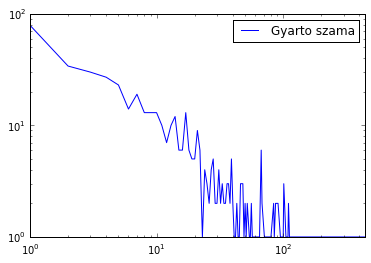

In [43]:
daata=pd.DataFrame.from_dict(dx,orient = "index")
daata.columns=["Gyarto szama"]
daata.plot(loglog=True)

## Diagramm: Hány gyártó gyárt terméket egy adott boltnak? +

In [44]:
tmp3 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp4=tmp3[tmp3["tph"]==30302]
tmp4
len(set(tmp4["cik_gyart"].tolist()))

344

In [45]:
tmp3.drop("cik",axis=1,inplace=True)
tmp3.drop("datum",axis=1,inplace=True)
tmp3.drop("cik_id",axis=1,inplace=True)
tmp3.drop("cik_desc2",axis=1,inplace=True)
tmp3.drop("vtsz_id",axis=1,inplace=True)
tmp3.drop("cik_me_id",axis=1,inplace=True)
tmp3.drop("cjel_id",axis=1,inplace=True)
tmp3.head(100)

,tph,mennyiseg,cik_gyart
0,30302,0,50136
1,30313,0,50136
2,30316,0,50136
3,30318,0,50136
4,30319,0,50136
5,30323,0,50136
6,30324,0,50136
7,30325,0,50136
8,30327,0,50136
9,30329,0,50136


In [46]:
tmp3.groupby(["tph","cik_gyart"]).count().head(10)

mennyiseg
tph   cik_gyart           
30103 0               4805
      50004            870
      50006             12
      50008            120
      50016              6
      50020              6
      50022            408
      50028            392
      50030              6
      50032             60

In [47]:
bolt_gyarto=tmp3.groupby(["tph"]).cik_gyart.nunique()
pd.DataFrame(bolt_gyarto).head(10)

,cik_gyart
tph,
30103,365
30104,421
30105,340
30106,320
30108,325
30109,307
30110,358
30111,365
30113,320


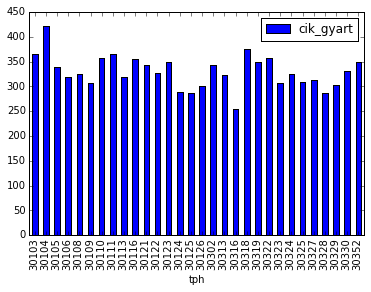

In [48]:
pd.DataFrame(bolt_gyarto).plot(kind='bar')

## -Diagramm: Adott termékcsoport mennyisége egy adott boltban! 

In [49]:
tmp5 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp6 = pd.merge(tmp5, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
tmp7=tmp6[(tmp6["tph"]==30302) & (tmp6["ccsop_id4"]==3303)]
len(tmp7)
tmp6.head(10)

,cik,tph,datum,mennyiseg,cik_id_x,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id,ccsop_id4,cik_id_y
0,1000002,30302,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
1,1000002,30313,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
2,1000002,30316,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
3,1000002,30318,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
4,1000002,30319,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
5,1000002,30323,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
6,1000002,30324,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
7,1000002,30325,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
8,1000002,30327,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
9,1000002,30329,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002


In [50]:
tmp6.drop("cik_id_x",axis=1,inplace=True)
tmp6.drop("cik_id_y",axis=1,inplace=True)
tmp6.drop("cjel_id",axis=1,inplace=True)
tmp6.drop("cik_me_id",axis=1,inplace=True)
tmp6.drop("vtsz_id",axis=1,inplace=True)
tmp6.drop("cik",axis=1,inplace=True)
#tmp6.drop("cik_gyart",axis=1,inplace=True)
tmp6.drop("cik_desc2",axis=1,inplace=True)
tmp6.head(10)

,tph,datum,mennyiseg,cik_gyart,ccsop_id4
0,30302,2016-02-02,0,50136,3303
1,30313,2016-02-02,0,50136,3303
2,30316,2016-02-02,0,50136,3303
3,30318,2016-02-02,0,50136,3303
4,30319,2016-02-02,0,50136,3303
5,30323,2016-02-02,0,50136,3303
6,30324,2016-02-02,0,50136,3303
7,30325,2016-02-02,0,50136,3303
8,30327,2016-02-02,0,50136,3303
9,30329,2016-02-02,0,50136,3303


In [51]:
len(tmp6[(tmp6["ccsop_id4"]==18) & (tmp6["tph"]==30103)])

36

## Egyes boltokban, napi lebontásban mennyi termék volt a ccsop_id4 csoport tagjaiból!

In [52]:
tmp6.groupby(["tph","datum","ccsop_id4"]).sum().head(500)

mennyiseg  cik_gyart
tph   datum      ccsop_id4                      
30103 2016-02-02 0                  0     209008
                 18                 0          0
                 111                0     101196
                 112             1200    1046428
                 114                0     152084
                 115                0          0
                 122                0     681806
                 124                0      52436
                 141                0      54806
                 142              200     708448
                 143                0     159936
                 144                0     219224
                 145                0      54806
                 152                0     488528
                 154                0          0
                 161                0     493254
                 162                0     438448
                 163                0     109612
                 164                0          0
                 166                0     109612
                 210                0     313930
                 211                0    2240560
                 212                0    1699718
                 213                0    1737970
                 214              100    1309632
                 215                0     456452
                 216                0     573648
                 217                0    1255166
                 218                0    1521176
                 219                0    1319316
...                               ...        ...
      2016-02-03 5504               0     351416
                 5601             700     503500
                 5602             400     100350
                 5604             100     201046
                 5700               0     253390
                 6102             100          0
                 6103               0          0
                 6104             100          0
                 6105             200          0
                 6106               0          0
                 6107             100          0
                 6108               0          0
                 6109               0          0
                 6110               0          0
                 6111               0          0
                 6112               0          0
                 6113               0          0
                 6201               0     110190
                 6301               0          0
                 6302             100          0
                 6304             200          0
                 6305             100          0
                 6306             100          0
                 6501             300     357196
                 6601               0     781706
                 6602               0     107716
                 6701               0     657916
                 6702               0      52450
                 6801               0          0
                 6802               0          0

[500 rows x 2 columns]

## Egyes boltokban, hány darab termék volt a ccsop_id4 csoport tagjaiból!

In [53]:
tmp6.groupby(["tph","ccsop_id4"]).mennyiseg.count()

tph    ccsop_id4
30103  0             30
       18            36
       111           30
       112          228
       114           30
       115           30
       122           88
       124            6
       141            6
       142           84
       143           18
       144           30
       145           36
       152           54
       154           10
       161           60
       162           54
       163           12
       164            6
       166           12
       210           36
       211          270
       212          204
       213          204
       214          156
       215           54
       216           66
       217          150
       218          174
       219          156
                   ... 
30352  7303         162
       7304          60
       7305          12
       7306         180
       7307         159
       7309         246
       7312          12
       7317          12
       7401         249
       7402          48

## Diagram: Hány bolt van a városokban? +

In [54]:
#import collections
#cnt=collections.Counter(geo["geo_varos"])
#cnt.values()
#cnt.keys()
boltgeo=pd.merge(boltok, geo, left_on='sek_cim', right_on='geo_id', how='inner')
boltgeo

,sek_id,sek_desc,sek_cim,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,10200,Cég 0. Raktár1,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
1,10300,Cég 0. Raktár2,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30116,Cég I. Bolt10,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30104,Cég I. Bolt2,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
5,30111,Cég I. Bolt8,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
6,30105,Cég I. Bolt3,5516,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
7,30106,Cég I. Bolt4,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
8,30113,Cég I. Bolt9,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
9,30108,Cég I. Bolt5,5525,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország


In [55]:
boltgeo.drop("geo_orszag",axis=1, inplace=True)
boltgeo.drop("geo_regio",axis=1, inplace=True)
boltgeo.drop("geo_megye",axis=1, inplace=True)
boltgeo.drop("geo_kerulet",axis=1, inplace=True)
boltgeo.drop("geo_id",axis=1, inplace=True)
boltgeo.drop("sek_cim",axis=1, inplace=True)
boltgeo.drop("sek_id",axis=1, inplace=True)

In [56]:
valami = boltgeo.groupby("geo_varos")
type(boltgeo["geo_varos"].tolist())

list

In [57]:
from collections import Counter
counts = Counter(boltgeo["geo_varos"].tolist())
print(counts)

Counter({u'B\xe9k\xe9scsaba': 3, u'D\xe9vav\xe1nya': 2, u'Medgyesbodz\xe1s': 2, u'Szeghalom': 2, u'F\xfczesgyarmat': 2, u'Gyomaendr\xf6d': 2, u'Nagyb\xe1nhegyes': 1, u'K\xe9tsoprony': 1, u'Gyula': 1, u'Kert\xe9szsziget': 1, u'Kardos': 1, u'Csan\xe1dap\xe1ca': 1, u'Magyarb\xe1nhegyes': 1, u'Hunya': 1, u'B\xe9k\xe9sszentandr\xe1s': 1, u'Pusztaottlaka': 1, u'Mez\xf6ber\xe9ny': 1, u'\xdajk\xedgy\xf3s': 1, u'Kondoros': 1, u'Kamut': 1, u'\xd6rm\xe9nyk\xfat': 1, u'K\xf6r\xf6slad\xe1ny': 1, u'Telekgerend\xe1s': 1, u'Csabacsud': 1, u'Medgyesegyh\xe1za': 1, u'Murony': 1})


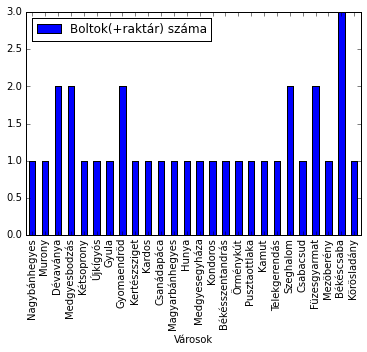

In [58]:
dictionary = dict(counts)
d = pd.DataFrame(dictionary.items())
d
d.columns = ['Városok', 'Boltok(+raktár) száma']
d.index=d["Városok"]
d.plot(kind='bar')

#CLUSTER:

## Leíró táblák

In [66]:
#cikk
#boltok
rendszer = pd.DataFrame(index=sorted(list(set(keszlet2.tph))),columns=sorted(list(set(keszlet2.cik))))
rendszer

,1000016,1000019,1000020,1000021,1000022,1000040,1000091,1000112,1000117,1000134,...,1021093,1021114,1021115,1021116,1021117,1021122,1021123,1021124,1021142,1021180
30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
keszlet2
keszlet2.index = range(0,len(keszlet2))
keszlet2.head(10)

,cik,tph,datum,mennyiseg
0,1000642,30302,2016-02-02,-100
1,1001063,30302,2016-02-02,300
2,1001065,30302,2016-02-02,100
3,1001575,30302,2016-02-02,100
4,1001876,30302,2016-02-02,100
5,1002138,30302,2016-02-02,100
6,1002156,30302,2016-02-02,100
7,1002163,30302,2016-02-02,100
8,1002279,30302,2016-02-02,200
9,1002280,30302,2016-02-02,-100


Átírtam keszlet2-re, egyrészt hogy gyorsabban fusson le, másrészt hogy a kerekítettel számoljon.

In [68]:
a=0
keszletcik = keszlet2.cik.tolist() 
for i in keszletcik:
    rendszer[i][keszlet2.loc[[a]]["tph"]] = 1
    a+=1
rendszer
rendszer_copy = rendszer

#Csupa 1-esek(/0-sok) megkeresése

In [69]:
rendszer.fillna(0,inplace=True)
rendszer.head(10)

,1000016,1000019,1000020,1000021,1000022,1000040,1000091,1000112,1000117,1000134,...,1021093,1021114,1021115,1021116,1021117,1021122,1021123,1021124,1021142,1021180
30103,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
30104,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30110,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30111,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30113,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
30116,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_sum = pd.DataFrame(rendszer.sum(axis=0))
egyesek = df_sum[df_sum[0] == 30]
egyesek

,0
1003330,30
1005869,30
1009685,30
1009714,30
1013055,30


### csupa egyesek vannak, csupa nullások nincsenek - minden boltban van/ egyikben sincs

In [71]:
lista_sum = egyesek.index.values.tolist()
for i in lista_sum:
    rendszer.drop(i,axis=1,inplace=True)
    
rendszer.head(20)
#df_sum.count()

,1000016,1000019,1000020,1000021,1000022,1000040,1000091,1000112,1000117,1000134,...,1021093,1021114,1021115,1021116,1021117,1021122,1021123,1021124,1021142,1021180
30103,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
30104,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30110,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30111,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30113,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
30116,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Klaszter tph/frissáru

In [72]:
csop_desc = result3[result3["ccsop_desc2"]=="FRISSÁRU".decode("utf-8")]
csop_desc.head(20)

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
5,1015412,Termék 0010284,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
6,1015413,Termék 0010285,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
7,1001141,Termék 0000898,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
8,1001143,Termék 0000900,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
9,1016785,Termék 0011471,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93


In [73]:
result_3 = result_2
result_3
result_2 = result_2[result_2["ccsop_desc2"]=="FRISSÁRU".decode("utf-8")]
result_2.head(20)

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1000002,30323,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1000002,30324,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1000002,30325,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1000002,30327,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1000002,30329,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [74]:
result_2.drop("datum",axis=1,inplace=True)
result_2.drop("ccsop_id4",axis=1,inplace=True)
result_2.drop("cik_id",axis=1,inplace=True)
result_2.drop("ccsop_id",axis=1,inplace=True)
result_2.drop("ccsop_id2",axis=1,inplace=True)
result_2.drop("ccsop_id3",axis=1,inplace=True)
result_2.drop("ccsop_desc3",axis=1,inplace=True)
result_2.drop("ccsop_desc2",axis=1,inplace=True)
result_2.drop("ccsop_desc",axis=1,inplace=True)
result_2.drop("ccsop_desc4",axis=1,inplace=True)

result_2

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()

,cik,tph,mennyiseg
0,1000002,30302,0
1,1000002,30313,0
2,1000002,30316,0
3,1000002,30318,0
4,1000002,30319,0
5,1000002,30323,0
6,1000002,30324,0
7,1000002,30325,0
8,1000002,30327,0
9,1000002,30329,0


In [75]:
result_2["mennyiseg"].max()

3400.0

In [76]:
klaszter = pd.DataFrame(index=sorted(list(set(keszlet.tph))), columns=sorted(list(set(result_2.cik))))
klaszter.fillna(0,inplace=True)
klaszter

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021160,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
result_2.cik

0         1000002
1         1000002
2         1000002
3         1000002
4         1000002
5         1000002
6         1000002
7         1000002
8         1000002
9         1000002
10        1000002
11        1000002
12        1000002
13        1000002
14        1000002
15        1000002
16        1000002
17        1000002
18        1000002
19        1000002
20        1000002
21        1000002
22        1000002
23        1000002
24        1000002
25        1000002
26        1000002
27        1000002
28        1000002
29        1000002
           ...   
965840    1000976
965841    1000976
965842    1000976
965843    1000976
965844    1000976
965845    1000976
965846    1000977
965847    1000977
965848    1000977
965849    1000977
965850    1000977
965851    1000977
965852    1000977
965853    1000977
965854    1000977
965855    1000977
965856    1000977
965857    1000977
965858    1000977
965859    1000977
965860    1000977
965861    1000977
965862    1000977
965863    1000977
965864    

In [84]:
frissarucik = result_2.cik.tolist()

result_2 = result_2[result_2["mennyiseg"] != 0]
result_2
hossz = len(result_2)
result_2.index = range(0,hossz)
result_2[result_2["cik"]==frissarucik[0]]

,cik,tph,mennyiseg
0,1015412,30104,100
1,1015412,30108,100
2,1015412,30111,100
3,1015412,30113,100
4,1015412,30110,100
5,1015412,30104,100
6,1015412,30108,100
7,1015412,30111,100
8,1015412,30113,100
9,1015412,30110,100


In [85]:
a=0
for i in frissarucik:
    klaszter[i][result_2.loc[[a]]["tph"]] += result_2.loc[[a]]["mennyiseg"].max()
    a += 1    
klaszter

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021160,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# %-olás + cluster

In [86]:
klaszter["sum"]=klaszter.sum(axis=1)
klaszter_copy=klaszter
klaszter

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273,sum
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56200
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,140100
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14000
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10400
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44400
30109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10200
30110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37800
30111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,70500
30113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63000
30116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31300


In [87]:
for i in klaszter.index.values.tolist():
    klaszter.loc[[i]] = klaszter.loc[[i]]/klaszter.loc[[i]]["sum"].max()
klaszter

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273,sum
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
klaszter.drop("sum",axis=1,inplace=True)


D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


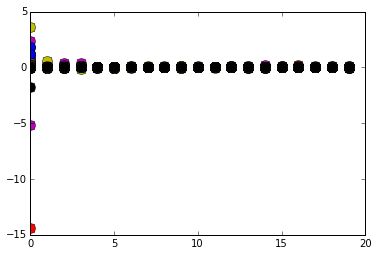

In [89]:
#klaszter.drop("cluster",axis=1,inplace=True)
klaszter.fillna(0,inplace=True)
from sklearn.cluster import KMeans
m = KMeans(7)
klaszter["cluster"] = m.fit_predict(klaszter.values)
for i in set(klaszter["cluster"]):
    c = klaszter[klaszter["cluster"] == i]
    c.drop("cluster",axis=1,inplace=True)
    plt.plot(c.values, 'o', markersize= 10)
#plt.axis([-0.01, 0.01, -0.031, 0.05])
plt.show()

In [90]:
klaszter["cluster"]

30103    4
30104    4
30105    4
30106    4
30108    2
30109    3
30110    2
30111    4
30113    4
30116    4
30121    6
30122    3
30123    4
30124    5
30125    2
30126    4
30302    4
30313    4
30316    2
30318    4
30319    4
30322    4
30323    4
30324    0
30325    4
30327    4
30328    1
30329    4
30330    4
30352    4
Name: cluster, dtype: int32

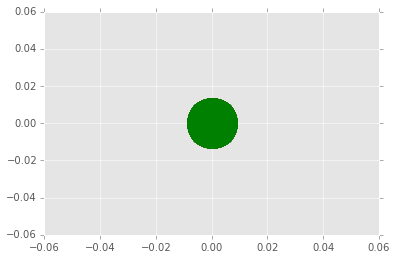

In [91]:
from matplotlib.pyplot import style
style.use("ggplot")
from sklearn.cluster import KMeans

X = klaszter.as_matrix()
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ["g.","r."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], X[i][2], X[i][3], X[i][4], X[i][5],
             colors[labels[i]], markersize = 100 )


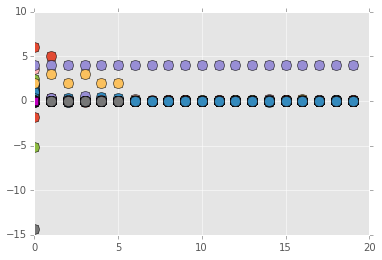

In [92]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

data = klaszter.as_matrix()

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,:],'o',
     data[idx==1,:],'o',
     data[idx==2,:],'o',
     data[idx==3,:],'o',
     data[idx==4,:],'o',markersize=10) # third cluster points
plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
show()

In [93]:
len(data[0])

1674

In [94]:
klaszter.to_csv("klaszter.csv", sep='\t', encoding='utf-8')

In [95]:
#klaszter
#klaszter_coopy = klaszter
#klaszter_coopy.drop("cluster",axis=1,inplace=True)

In [96]:
type(c)

pandas.core.frame.DataFrame

#Klaszter tph/ccsop_id2

In [97]:
csop_desc2 = sorted(list(set(result_3.ccsop_desc2.tolist())))
csoportok = pd.DataFrame(index=sorted(list(set(result_3.tph))), columns=csop_desc2)
csoportok

,EGYÉB CIKKEK,FRISSÁRU,HÚS,HÚSKÉSZTMÉNYEK,ITALOK,NON FOOD TERMÉKEK,"PAPÍR, VEGYIÁRU",SZOLGÁLTATÁSOK,"ZÖLDSÉG, GYÜMÖLCS",ÉLELMISZER
30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
result_3.head(50)

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1000002,30323,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1000002,30324,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1000002,30325,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1000002,30327,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1000002,30329,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [99]:
result_3.drop("datum",axis=1,inplace=True)
result_3.drop("ccsop_id4",axis=1,inplace=True)
result_3.drop("cik_id",axis=1,inplace=True)
result_3.drop("ccsop_id",axis=1,inplace=True)
result_3.drop("ccsop_desc",axis=1,inplace=True)
result_3.drop("ccsop_id2",axis=1,inplace=True)
result_3.drop("ccsop_id3",axis=1,inplace=True)
result_3.drop("ccsop_desc3",axis=1,inplace=True)
result_3.drop("ccsop_desc4",axis=1,inplace=True)
result_3.head(100)

,cik,tph,mennyiseg,ccsop_desc2
0,1000002,30302,0,FRISSÁRU
1,1000002,30313,0,FRISSÁRU
2,1000002,30316,0,FRISSÁRU
3,1000002,30318,0,FRISSÁRU
4,1000002,30319,0,FRISSÁRU
5,1000002,30323,0,FRISSÁRU
6,1000002,30324,0,FRISSÁRU
7,1000002,30325,0,FRISSÁRU
8,1000002,30327,0,FRISSÁRU
9,1000002,30329,0,FRISSÁRU


In [100]:
result_3 = result_3[result_3["mennyiseg"] != 0]

In [101]:
result_3
result_3.index = range(0,len(result_3))
result_3.head(10)

,cik,tph,mennyiseg,ccsop_desc2
0,1015412,30104,100,FRISSÁRU
1,1015412,30108,100,FRISSÁRU
2,1015412,30111,100,FRISSÁRU
3,1015412,30113,100,FRISSÁRU
4,1015412,30110,100,FRISSÁRU
5,1015412,30104,100,FRISSÁRU
6,1015412,30108,100,FRISSÁRU
7,1015412,30111,100,FRISSÁRU
8,1015412,30113,100,FRISSÁRU
9,1015412,30110,100,FRISSÁRU


In [102]:
listacsop = result_3.ccsop_desc2.tolist()
a=0
csoportok.fillna(0,inplace=True)
for i in listacsop:
    csoportok[i][result_3.loc[[a]]["tph"]] += result_3.loc[[a]]["mennyiseg"].max()
    a += 1
csoportok

,EGYÉB CIKKEK,FRISSÁRU,HÚS,HÚSKÉSZTMÉNYEK,ITALOK,NON FOOD TERMÉKEK,"PAPÍR, VEGYIÁRU",SZOLGÁLTATÁSOK,"ZÖLDSÉG, GYÜMÖLCS",ÉLELMISZER
30103,16600,26900,7400,1300,67800,9000,40300,24000,8000,241800
30104,47300,66800,34700,8200,237500,42600,160900,29200,36000,456100
30105,31700,6600,2700,0,49400,5500,22100,13400,3300,487300
30106,3300,5300,0,0,13800,600,19500,10800,400,34000
30108,6000,21200,1600,600,18800,400,21500,9500,2700,168100
30109,13200,5100,1400,0,13900,10500,28500,7800,700,25100
30110,14800,18300,5000,0,46300,1800,37500,15900,13300,103300
30111,2900,33100,4800,2400,50500,6700,33100,25000,8500,113200
30113,-400,28700,0,1100,61000,15000,49300,9600,3300,-57200
30116,2600,13500,10100,800,39400,-600,29300,20800,7100,39300


In [103]:
csoportok["sum"]=csoportok.sum(axis=1)
#klaszter_copy=klaszter
#klaszter

In [104]:
for i in csoportok.index.values.tolist():
    csoportok.loc[[i]] = csoportok.loc[[i]]/csoportok.loc[[i]]["sum"].max()
csoportok.drop("sum",axis=1,inplace=True)
csoportok

,EGYÉB CIKKEK,FRISSÁRU,HÚS,HÚSKÉSZTMÉNYEK,ITALOK,NON FOOD TERMÉKEK,"PAPÍR, VEGYIÁRU",SZOLGÁLTATÁSOK,"ZÖLDSÉG, GYÜMÖLCS",ÉLELMISZER
30103,0.037463,0.060709,0.016701,0.002934,0.153013,0.020311,0.090950,0.054164,0.018055,0.545701
30104,0.042259,0.059680,0.031002,0.007326,0.212186,0.038060,0.143751,0.026088,0.032163,0.407487
30105,0.050965,0.010611,0.004341,0.000000,0.079421,0.008842,0.035531,0.021543,0.005305,0.783441
30106,0.037628,0.060433,0.000000,0.000000,0.157355,0.006842,0.222349,0.123147,0.004561,0.387685
30108,0.023962,0.084665,0.006390,0.002396,0.075080,0.001597,0.085863,0.037939,0.010783,0.671326
30109,0.124294,0.048023,0.013183,0.000000,0.130885,0.098870,0.268362,0.073446,0.006591,0.236347
30110,0.057767,0.071429,0.019516,0.000000,0.180718,0.007026,0.146370,0.062061,0.051913,0.403201
30111,0.010350,0.118130,0.017131,0.008565,0.180228,0.023911,0.118130,0.089222,0.030335,0.403997
30113,-0.003623,0.259964,0.000000,0.009964,0.552536,0.135870,0.446558,0.086957,0.029891,-0.518116
30116,0.016020,0.083179,0.062230,0.004929,0.242760,-0.003697,0.180530,0.128158,0.043746,0.242144


In [105]:
csoportok.columns = [1,2,3,4,5,6,7,8,9,10]
csoportok

,1,2,3,4,5,6,7,8,9,10
30103,0.037463,0.060709,0.016701,0.002934,0.153013,0.020311,0.090950,0.054164,0.018055,0.545701
30104,0.042259,0.059680,0.031002,0.007326,0.212186,0.038060,0.143751,0.026088,0.032163,0.407487
30105,0.050965,0.010611,0.004341,0.000000,0.079421,0.008842,0.035531,0.021543,0.005305,0.783441
30106,0.037628,0.060433,0.000000,0.000000,0.157355,0.006842,0.222349,0.123147,0.004561,0.387685
30108,0.023962,0.084665,0.006390,0.002396,0.075080,0.001597,0.085863,0.037939,0.010783,0.671326
30109,0.124294,0.048023,0.013183,0.000000,0.130885,0.098870,0.268362,0.073446,0.006591,0.236347
30110,0.057767,0.071429,0.019516,0.000000,0.180718,0.007026,0.146370,0.062061,0.051913,0.403201
30111,0.010350,0.118130,0.017131,0.008565,0.180228,0.023911,0.118130,0.089222,0.030335,0.403997
30113,-0.003623,0.259964,0.000000,0.009964,0.552536,0.135870,0.446558,0.086957,0.029891,-0.518116
30116,0.016020,0.083179,0.062230,0.004929,0.242760,-0.003697,0.180530,0.128158,0.043746,0.242144


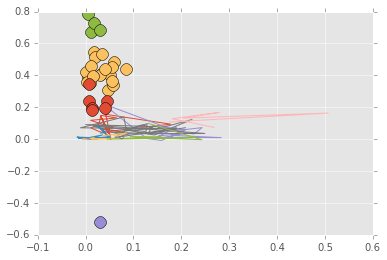

In [106]:
from sklearn.cluster import KMeans
m = KMeans(4)
csoportok["cluster"] = m.fit_predict(csoportok[[1,2,3,4,5,6,7,8,9,10]].values)
for i in set(csoportok["cluster"]):
    c = csoportok[csoportok["cluster"] == i]
    plt.plot(c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], 'o', markersize=12)
#plt.axis([-0.001, 0.15, -0.001, 0.15])
plt.show()

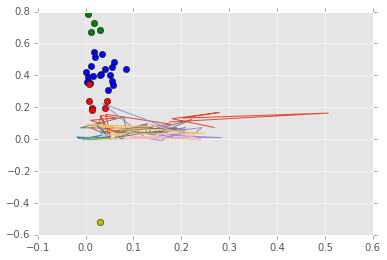

In [107]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = csoportok.as_matrix()

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,4)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],data[idx==0,2],data[idx==0,3],data[idx==0,4],data[idx==0,5],data[idx==0,6],data[idx==0,7],data[idx==0,8],data[idx==0,9],'ob',
     data[idx==1,0],data[idx==1,1],data[idx==1,2],data[idx==1,3],data[idx==1,4],data[idx==1,5],data[idx==1,6],data[idx==1,7],data[idx==1,8],data[idx==1,9],'or',
    data[idx==2,0],data[idx==2,1],data[idx==2,2],data[idx==2,3],data[idx==2,4],data[idx==2,5],data[idx==2,6],data[idx==2,7],data[idx==2,8],data[idx==2,9],'og',
    data[idx==3,0],data[idx==3,1],data[idx==3,2],data[idx==3,3],data[idx==3,4],data[idx==3,5],data[idx==3,6],data[idx==3,7],data[idx==3,8],data[idx==3,9],'oy')
#plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [108]:
csoportok

,1,2,3,4,5,6,7,8,9,10,cluster
30103,0.037463,0.060709,0.016701,0.002934,0.153013,0.020311,0.090950,0.054164,0.018055,0.545701,0
30104,0.042259,0.059680,0.031002,0.007326,0.212186,0.038060,0.143751,0.026088,0.032163,0.407487,0
30105,0.050965,0.010611,0.004341,0.000000,0.079421,0.008842,0.035531,0.021543,0.005305,0.783441,3
30106,0.037628,0.060433,0.000000,0.000000,0.157355,0.006842,0.222349,0.123147,0.004561,0.387685,0
30108,0.023962,0.084665,0.006390,0.002396,0.075080,0.001597,0.085863,0.037939,0.010783,0.671326,3
30109,0.124294,0.048023,0.013183,0.000000,0.130885,0.098870,0.268362,0.073446,0.006591,0.236347,2
30110,0.057767,0.071429,0.019516,0.000000,0.180718,0.007026,0.146370,0.062061,0.051913,0.403201,0
30111,0.010350,0.118130,0.017131,0.008565,0.180228,0.023911,0.118130,0.089222,0.030335,0.403997,0
30113,-0.003623,0.259964,0.000000,0.009964,0.552536,0.135870,0.446558,0.086957,0.029891,-0.518116,1
30116,0.016020,0.083179,0.062230,0.004929,0.242760,-0.003697,0.180530,0.128158,0.043746,0.242144,2


# KNN a  rendszer táblától

In [109]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(rendszer)
distances, indices = nbrs.kneighbors(rendszer)
distances

array([[  0.        ,  25.63201124,  25.67099531,  25.90366769,
         25.92296279,  25.92296279,  25.96150997],
       [  0.        ,  34.42382896,  34.45286635,  34.56877203,
         34.69870315,  34.72751071,  34.82814953],
       [  0.        ,  17.54992877,  17.77638883,  17.8325545 ,
         17.91647287,  18.27566688,  18.41195264],
       [  0.        ,  12.28820573,  13.07669683,  13.15294644,
         13.19090596,  14.4222051 ,  15.13274595],
       [  0.        ,  14.56021978,  14.69693846,  15.        ,
         15.03329638,  15.71623365,  16.        ],
       [  0.        ,  11.61895004,  11.70469991,  12.36931688,
         13.19090596,  13.6381817 ,  14.93318452],
       [  0.        ,  18.65475811,  18.65475811,  18.76166304,
         18.89444363,  18.94729532,  18.97366596],
       [  0.        ,  21.9317122 ,  21.9544984 ,  21.9544984 ,
         21.97726098,  22.02271555,  22.04540769],
       [  0.        ,  24.39262184,  24.43358345,  24.53568829,
         24.6170

In [110]:
indices

array([[ 0,  4, 11, 10,  3, 25, 27],
       [ 1,  6, 29,  2, 15,  0, 21],
       [ 2, 10, 14, 18,  3,  4,  5],
       [ 3, 18, 10, 14,  5, 13, 11],
       [ 4, 18, 14,  5, 10,  3, 11],
       [ 5, 18, 14, 10,  3, 13, 11],
       [ 6, 18, 14, 10,  3,  5,  4],
       [ 7, 10,  5,  3, 18, 14, 25],
       [ 8, 14, 18,  3,  5,  4, 25],
       [ 9, 18, 10,  3, 14, 25,  5],
       [10, 18, 14,  5,  3, 13, 11],
       [11, 14, 18, 10,  5,  3, 13],
       [12, 15,  6, 25, 27,  9,  2],
       [13, 18,  5, 14, 10,  3, 11],
       [14, 18,  5, 10,  3, 13, 11],
       [15, 14, 10, 18,  5, 11,  3],
       [16, 27, 14, 18,  3, 10,  5],
       [17, 14, 11, 18,  4, 25,  5],
       [18, 14,  5, 10,  3, 13, 11],
       [19, 15, 25,  4,  2,  6, 20],
       [20, 10, 18, 14,  5,  3, 13],
       [21, 14, 18,  5, 10,  3,  4],
       [22, 18,  5, 14, 10,  3, 24],
       [23, 18, 14,  5, 10,  3,  4],
       [24, 14, 18, 10,  5,  3, 13],
       [25, 14, 18,  3, 10,  5,  4],
       [26, 18, 10,  5, 14,  3,  4],
 

## A boltok elhelyezkedése

In [111]:
nbrs.kneighbors_graph(rendszer).toarray()

array([[ 1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,

## A legegyedibb bolt
##1. 5 átlaga alapján, 2. a legtávolabbi nn-alapján

In [112]:
maxd=0
wstore=0
for i in range(len(distances[:,1])):
    sum=0
    for j in range(len(distances[1,:])):
        sum+=distances[i][j]
    sum/=distances.shape[1]
    if(maxd<sum):
        maxd=sum
        wstore=i
print(wstore)

1


In [113]:
print(rendszer[wstore:wstore+1].index.values)

[30104]


In [114]:
maxd2=0
wstore2=0
for i in range(len(distances[:,1])):
        if (distances[i][1] > maxd2):
            maxd2=distances[i][1]
            wstore2=i
print(maxd2)

34.4238289561


# Ajánlórendszer 1

In [115]:
#Melyik boltnak teszünk ajánlatot
shop=5
osztaly=4
dfcsop=klaszter[klaszter["cluster"] == osztaly]
mtxcsop=dfcsop.as_matrix()
oszlop=mtxcsop.size/len(mtxcsop)

In [118]:
#legnépszerűbb termék
popmax = 0
ajanlat = -1
for i in range(oszlop-1):
    if(mtxcsop[shop][i] == 0):
        pop = 0
        for j in range(len(dfcsop)):
            pop += mtxcsop[j][i]
            if(pop > popmax and j != shop):
                popmax=pop
                ajanlat=i

In [119]:
if(ajanlat == -1):
    print("Nem ajánlunk terméket kirakni")
else:
    print("{}: {}".format("Az ajanlatunk", dfcsop.dtypes.index[ajanlat]))

Az ajanlatunk: 1000781


# Ajánlórendszer 2 - bevásárlólista és időpont(ok) alapján bolt ajánlása

In [366]:
# Felhasználó igénye:
ido_rec = ["2016-02-02","2016-02-03"]
cikkek_rec = [1000642,1001575,1014624,1021093]

In [368]:
#táblázat megalkotása, megkeressük a boltokat ahol lehet kapni a terméket
felhasznalo_igeny = keszlet2[keszlet2["datum"].isin(ido_rec)]
felhasznalo_igeny = felhasznalo_igeny[felhasznalo_igeny["cik"].isin(cikkek_rec)]
felhasznalo_igeny = felhasznalo_igeny[felhasznalo_igeny["mennyiseg"] >= 0]
felhasznalo_igeny.index = range(len(felhasznalo_igeny))

#új táblázat; hol mekkora mennyiségben fordul elő
cikkek_rec_found = sorted(list(set(felhasznalo_igeny.cik)))
boltrecommend = pd.DataFrame(index=sorted(list(set(felhasznalo_igeny.tph))), columns=cikkek_rec_found)
boltrecommend.fillna(0,inplace=True)

#táblázat feltöltése
for i in range(len(felhasznalo_igeny)):
    cikkk = felhasznalo_igeny.loc[[i]]["cik"]
    tphhh = felhasznalo_igeny.loc[[i]]["tph"]
    boltrecommend[cikkk[i]][tphhh[i]] += felhasznalo_igeny.loc[[i]]["mennyiseg"]
#boltrecommend

In [370]:
#keressük azokat a boltokat, ahol az összes termék kapható
#hiányzik: legtöbb terméket mutató bolt megkeresése!!!!!!!!!!!! 
boltrecommend["rating"] = boltrecommend.min(axis=1)
boltrecommend_0 = boltrecommend[boltrecommend["rating"] > 0]
boltrecommend_0["terjed"] = boltrecommend_0.max(axis=1) - boltrecommend_0.min(axis=1) 
boltrecommend_0 = boltrecommend_0[(boltrecommend_0["rating"] == boltrecommend_0["rating"].max())]
boltrecommend_0 = boltrecommend_0[(boltrecommend_0["terjed"] == boltrecommend_0["terjed"].min())]

print("{}: {} {}".format("Ahol be kell vasarolnod: ", boltrecommend_0.T.columns.tolist()[0], " bolt"))

Ahol be kell vasarolnod: : 30352  bolt


D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [371]:
maradek = [item for item in cikkek_rec if item not in cikkek_rec_found]
#for ciklus kimaradt
print("{} {}".format("Termekek, amelyeket nem tudsz megvasarolni a boltban: ", maradek[0]))

Termekek, amelyeket nem tudsz megvasarolni a boltban:  1000642


In [372]:
#egyáltalán kapható-e a termék
if len(keszlet2[(keszlet2["mennyiseg"] > 0) & (keszlet2["cik"] == maradek[0])]) == 0:
    print("A termek kod nem letezik")
else:
    print("A termek letezik")

A termek kod nem letezik


## Hasonló boltok ajánlása, ahol kaphatóak a termékek... Befejezni!